# Expected Model Change

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from sklearn.datasets import load_digits

In [36]:
X, y= load_digits(n_class=2, return_X_y=True)

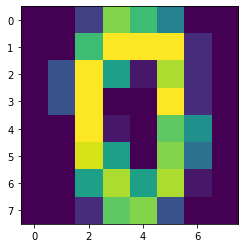

In [37]:
plt.imshow(X[4].reshape(8, 8))

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(64, 2)  # 5*5 from image dimension

    def forward(self, x):
       
        x = F.relu(self.fc1(x))

        #x = self.fc2(x)
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=64, out_features=2, bias=True)
)


In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [64]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(0, 100, 5):
        inputs = torch.Tensor(X[i:i+5])
        labels = torch.Tensor(y[i:i+5]).type(torch.LongTensor)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss))
        running_loss = 0.0



[1,     1] loss: 0.707
[1,     6] loss: 0.610
[1,    11] loss: 0.693
[1,    16] loss: 0.693
[1,    21] loss: 0.693
[1,    26] loss: 0.579
[1,    31] loss: 0.318
[1,    36] loss: 0.297
[1,    41] loss: 0.281
[1,    46] loss: 0.683
[1,    51] loss: 0.589
[1,    56] loss: 0.462
[1,    61] loss: 0.382
[1,    66] loss: 0.283
[1,    71] loss: 0.693
[1,    76] loss: 0.956
[1,    81] loss: 0.689
[1,    86] loss: 0.311
[1,    91] loss: 0.329
[1,    96] loss: 0.693
[2,     1] loss: 0.542
[2,     6] loss: 0.416
[2,    11] loss: 0.310
[2,    16] loss: 0.278
[2,    21] loss: 0.558
[2,    26] loss: 0.278
[2,    31] loss: 0.279
[2,    36] loss: 0.285
[2,    41] loss: 0.281
[2,    46] loss: 0.555
[2,    51] loss: 0.278
[2,    56] loss: 0.279
[2,    61] loss: 0.279
[2,    66] loss: 0.278
[2,    71] loss: 0.693
[2,    76] loss: 0.283
[2,    81] loss: 0.280
[2,    86] loss: 0.285
[2,    91] loss: 0.279
[2,    96] loss: 0.571
[3,     1] loss: 0.303
[3,     6] loss: 0.416
[3,    11] loss: 0.297
[3,    16] 

In [69]:
y_hat = torch.argmax(net(torch.Tensor(X[105:])), axis=1)

In [70]:
y_true = y[105:]

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_true, y_hat)

0.49019607843137253

In [90]:
inp = torch.tensor(X[106:107]).type(torch.FloatTensor)
out = net(inp)
c = criterion(out, torch.Tensor(y[106:107]).type(torch.LongTensor))
c.backward()

In [93]:
c._grad

<ipython-input-93-68a08c2d82be>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  c._grad
